<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/NeuralNetworks_LC3_Training_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Live Coding - Training ANNs </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Propulsion Academy, 2020</center>



# Live Coding - Training ANNs

This notebook has been adapted from the tutorial of [hands on Machine learning, chapter 11](https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb).

## Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.



In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import keras

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Vanishing gradient problem

### Example: LeakyRelu activation function and he_normal weight initialization

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656.8245 - accuracy:  - ETA: 0s - - ETA: 0s - loss: 0.7955 - accuracy: 0.73
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7902
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200


### Batch Normalization

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
bn1.updates

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8293 - accuracy: 0.7221 - val_loss: 0.5539 - val_accuracy: 0.8160 - - ETA: 0s - loss: 0.8372 - accuracy: 
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5703 - accuracy: 0.8035 - val_loss: 0.4792 - val_accuracy: 0.8378
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5161 - accuracy: 0.8213 - val_loss: 0.4424 - val_accuracy: 0.8492
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4789 - accuracy: 0.8316 - val_loss: 0.4212 - val_accuracy: 0.8570
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4548 - accuracy: 0.8406 - val_loss: 0.4050 - val_accuracy: 0.8614


Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0346 - accuracy: 0.6739 - val_loss: 0.6680 - val_accuracy: 0.7886
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6757 - accuracy: 0.7818 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 3/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5961 - accuracy: 0.8021 - val_loss: 0.4996 - val_accuracy: 0.8352curacy: 0.79 - ETA: 2s - l -
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5456 - accuracy: 0.8176 - val_loss: 0.4655 - val_accuracy: 0.8462
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5140 - accuracy: 0.8249 - val_loss: 0.4420 - val_accuracy: 0.8506


## Optimizers
### Gradient descent optimizers (SGD, Adam, Adagrad, RMSProp)


In [ ]:
#examples of different optimizers
#optimizer = keras.optimizers.Adagrad(lr=0.001)

#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Optimizing learning rate

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 5
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5835 - accuracy: 0.7973 - val_loss: 0.4623 - val_accuracy: 0.8438
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4487 - accuracy: 0.8396 - val_loss: 0.4157 - val_accuracy: 0.8584
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4190 - accuracy: 0.8518 - val_loss: 0.4665 - val_accuracy: 0.8236
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4017 - accuracy: 0.8575 - val_loss: 0.3964 - val_accuracy: 0.8626
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8623 - val_loss: 0.3859 - val_accuracy: 0.8660


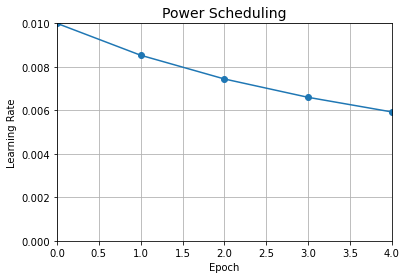

In [ ]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Learning Rate Scheduling

The default learning rate schedule is to use a constant learning rate to update network weights for each training epoch. However, adapting the learning rate for your stochastic gradient descent optimization procedure can increase performance and reduce training time.

It provides the benefit of making large changes at the beginning of the training procedure when larger learning rate values are used, and decreasing the learning rate such that a smaller rate and therefore smaller training updates are made to weights later in the training procedure.

Keras has multiple learning rate schedule APIs:
- ExponentialDecay
- PiecewiseConstantDecay
- PolynomialDecay
- InverseTimeDecay

Further info on keras learning rate schedules: https://keras.io/api/optimizers/learning_rate_schedules/

### Learning Rate Scheduling: 1cycle Scheduling

The motivation behind a cycling schedule rate is to oscillate the learning rate towards higher learning rate to help to get out of saddle points. If saddle point is elaborate plateau, the lower learning rates might not be able get gradient out of saddle point. (Conventionally , the learning rate is decreased as the learning starts converging with time)

The cycle is number of iterations where we go from lower bound learning rate to higher bound and back to lower bound. 




In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)

In [ ]:
from keras import backend as K
history = model.fit(X_train, 
                    y_train, 
                    epochs=n_epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[onecycle])


Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8665 - val_loss: 0.4212 - val_accuracy: 0.8495
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.8548
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8677 - val_loss: 0.5027 - val_accuracy: 0.8093
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8692 - val_loss: 0.4067 - val_accuracy: 0.8572
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8704 - val_loss: 0.4095 - val_accuracy: 0.8537
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.8722 - val_loss: 0.3980 - val_accuracy: 0.8597
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3502 - accuracy: 0.8754 - val_loss: 0.4022 - val_accuracy:

## Regularization

### $\ell_1$ and $\ell_2$ regularization

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 4ms/step - loss: 1.5494 - accuracy: 0.7775 - val_loss: 1.0217 - val_accuracy: 0.7630
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9076 - accuracy: 0.7928 - val_loss: 0.8534 - val_accuracy: 0.8176


In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 4ms/step - loss: 1.6293 - accuracy: 0.7792 - val_loss: 1.0124 - val_accuracy: 0.7664
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9057 - accuracy: 0.7962 - val_loss: 0.8513 - val_accuracy: 0.8200


### Dropout

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5822 - accuracy: 0.7888 - val_loss: 0.4178 - val_accuracy: 0.8420
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4550 - accuracy: 0.8317 - val_loss: 0.3668 - val_accuracy: 0.8662


## Hyperparameters
### hyperparameter optimization: n_hidden, n_neurons, learning_rate


In [ ]:
!pip install keras-tuner
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D


In [ ]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
    return model


Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn. In this tutorial, you use the Hyperband tuner.

To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs).

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')  

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

Run the hyperparameter search. The arguments for the search method are the same as those used for tf.keras.model.fit in addition to the callback above.


More info on kerastuner: https://www.tensorflow.org/tutorials/keras/keras_tuner



In [ ]:
import IPython


In [ ]:
tuner.search(x=train_images, y=train_labels,epochs=5,batch_size=64,validation_data=(test_images, test_labels),  callbacks = [ClearTrainingOutput()])
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")






INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 192 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
best_hps

### Tensorboard


More info on TensorBoard: TensorFlow's visualization toolkit
https://www.tensorflow.org/tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
#1. Experiment setup and the HParams experiment summary
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
#2. Adapt TensorFlow runs to log hyperparameters and metrics
def train_test_model(hparams):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])
    
    model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )
    
    model.fit(X_train, y_train, epochs=1) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

In [ ]:
#For each run, log an hparams summary with the hyperparameters and final accuracy:


def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

Start runs and log them all under one parent directory


You can now try multiple experiments, training each one with a different set of hyperparameters.

For simplicity, use a grid search: try all combinations of the discrete parameters and just the lower and upper bounds of the real-valued parameter. For more complex scenarios, it might be more effective to choose each hyperparameter value randomly (this is called a random search). There are more advanced methods that can be used.

Run a few experiments, which will take a few minutes:

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1



--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'adam'}
313/313 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.75 - ETA: 0s - loss: 0.4795 - accuracy: 0.83 - ETA: 0s - loss: 0.4948 - accuracy: 0.82 - ETA: 0s - loss: 0.5059 - accuracy: 0.82 - ETA: 0s - loss: 0.5097 - accuracy: 0.82 - ETA: 0s - loss: 0.5069 - accuracy: 0.82 - ETA: 0s - loss: 0.5081 - accuracy: 0.82 - 0s 1ms/step - loss: 0.5062 - accuracy: 0.8216
--- Starting trial: run-1
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'sgd'}
313/313 [==============================] - ETA: 0s - loss: 0.7276 - accuracy: 0.65 - ETA: 0s - loss: 0.6530 - accuracy: 0.78 - ETA: 0s - loss: 0.6532 - accuracy: 0.78 - ETA: 0s - loss: 0.6705 - accuracy: 0.77 - ETA: 0s - loss: 0.6784 - accuracy: 0.77 - ETA: 0s - loss: 0.6781 - accuracy: 0.77 - ETA: 0s - loss: 0.6779 - accuracy: 0.77 - ETA: 0s - loss: 0.6761 - accuracy: 0.77 - ETA: 0s - loss: 0.6744 - accuracy: 0.77 - 0s 1ms/step - loss: 0.6739 - accura

In [ ]:
#The HParams dashboard can now be opened. Start TensorBoard and click on "HParams" at the top.
%tensorboard --logdir logs/hparam_tuning